In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import japanize_matplotlib

#出力する行数を設定、省略をなくす
pd.set_option('display.max_rows', 500)

from sklearn.metrics import mean_absolute_error


In [2]:
train=pd.read_csv('train_aranged.csv')
train.head()

,ID,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,40020197,40133,福岡県,谷,桜坂,7,２ＬＤＫ,3.806662,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2021.50,改装済,7.041393
1,40031380,40137,福岡県,西新,西新,4,１Ｋ,2.708050,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2020.50,未改装,6.602060
2,40030436,40137,福岡県,小田部,室見,18,４ＬＤＫ,4.382027,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2020.99,改装済,7.397940
3,40015295,40132,福岡県,竹丘町,雑餉隈,5,２ＬＤＫ,4.094345,16.0,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2020.25,未改装,7.278754
4,40147771,40133,福岡県,荒戸,大濠公園,6,３ＤＫ,4.094345,35.0,ＳＲＣ,住宅,NaN,商業地域,80.0,400.0,2007.50,未改装,6.929419


In [3]:
#カテゴリ変数化------------------------------------<
use_columns=["都道府県名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "今後の利用目的", "都市計画", "改装"]
for col in use_columns:
    train[col] = train[col].astype("category")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722564 entries, 0 to 722563
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   ID            722564 non-null  int64   
 1   市区町村コード       722564 non-null  int64   
 2   都道府県名         722564 non-null  category
 3   地区名           721896 non-null  category
 4   最寄駅：名称        719833 non-null  category
 5   最寄駅：距離（分）     722564 non-null  int64   
 6   間取り           696674 non-null  category
 7   面積（㎡）         722564 non-null  float64 
 8   建築年           722564 non-null  float64 
 9   建物の構造         703412 non-null  category
 10  用途            651706 non-null  category
 11  今後の利用目的       356647 non-null  category
 12  都市計画          702746 non-null  category
 13  建ぺい率（％）       698403 non-null  float64 
 14  容積率（％）        698403 non-null  float64 
 15  取引時点          722564 non-null  float64 
 16  改装            654490 non-null  category
 17  取引価格（総額）_log  722564 non-null

In [15]:
test=pd.read_csv('test_adjusted.csv')
test.head()

,ID,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,1000078,1101,北海道,大通西,西１１丁目,1,３ＬＤＫ,4.317488,6.0,ＲＣ,住宅,住宅,商業地域,80.0,600.0,2021.50,未改装
1,1000121,1101,北海道,大通西,西１８丁目,0,１ＤＫ,3.401197,45.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
2,1000123,1101,北海道,大通西,西１８丁目,3,３ＬＤＫ,4.248495,38.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
3,1000127,1101,北海道,大通西,西１８丁目,2,２ＬＤＫ,3.912023,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,未改装
4,1000129,1101,北海道,大通西,西１８丁目,2,１ＤＫ,3.806662,31.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,改装済


In [16]:
#カテゴリ変数化------------------------------------<
use_columns=["都道府県名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "今後の利用目的", "都市計画", "改装"]
for col in use_columns:
    test[col] = test[col].astype("category")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21005 entries, 0 to 21004
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         21005 non-null  int64   
 1   市区町村コード    21005 non-null  int64   
 2   都道府県名      21005 non-null  category
 3   地区名        21004 non-null  category
 4   最寄駅：名称     21000 non-null  category
 5   最寄駅：距離（分）  21005 non-null  int64   
 6   間取り        19847 non-null  category
 7   面積（㎡）      21005 non-null  float64 
 8   建築年        21005 non-null  float64 
 9   建物の構造      19776 non-null  category
 10  用途         15396 non-null  category
 11  今後の利用目的    20081 non-null  category
 12  都市計画       20701 non-null  category
 13  建ぺい率（％）    20596 non-null  float64 
 14  容積率（％）     20596 non-null  float64 
 15  取引時点       21005 non-null  float64 
 16  改装         18032 non-null  category
dtypes: category(9), float64(5), int64(3)
memory usage: 1.8 MB


In [6]:
'''
１平米あたりの価格の対数をカラムとして加える
これが目的変数
'''
#面積の対数をとってカラムとする
train_area_log=train

#1平米あたりの価格の対数をとったものが、一時的なtmp目的変数
train_area_log['価格/面積_log']=train_area_log['取引価格（総額）_log']-train_area_log['面積（㎡）']
train_area_log.head(3)

,ID,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log,価格/面積_log
0,40020197,40133,福岡県,谷,桜坂,7,２ＬＤＫ,3.806662,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2021.50,改装済,7.041393,3.234730
1,40031380,40137,福岡県,西新,西新,4,１Ｋ,2.708050,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2020.50,未改装,6.602060,3.894010
2,40030436,40137,福岡県,小田部,室見,18,４ＬＤＫ,4.382027,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2020.99,改装済,7.397940,3.015913


In [7]:
train_area_log=train_area_log.drop('ID', axis=1)

"""
新手法
"""

from sklearn.model_selection import train_test_split

#説明変数 ： X
Xn=train_area_log.drop(['取引価格（総額）_log','価格/面積_log'], axis=1)

#目的変数 : y
yn=train_area_log[['取引価格（総額）_log','価格/面積_log']]

#訓練データと検証データに分割, 7:3
train_val_Xn, test_Xn, train_val_yn, test_yn = train_test_split(Xn, yn, test_size=0.2, random_state=1)
train_Xn, val_Xn, train_yn, val_yn = train_test_split(train_val_Xn, train_val_yn, test_size=0.2, random_state=1)

#面積あたりの価格予測したい
train_yn_tmp=train_yn['価格/面積_log']
val_yn_tmp=val_yn['価格/面積_log']
test_yn_tmp=test_yn['価格/面積_log']

#本来予測したい
train_yn=train_yn['取引価格（総額）_log']
val_yn=val_yn['取引価格（総額）_log']
test_yn=test_yn['取引価格（総額）_log']


In [48]:
import lightgbm as lgb

#訓練データと検証データに分割, 7:3
#train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=1)

trains = lgb.Dataset(train_Xn, train_yn_tmp)
valids = lgb.Dataset(val_Xn, val_yn_tmp)

params={
 'objective': 'regression_l1',
 'metric': 'l1',
 'verbosity': -1,
 'n_jobs': -1,
 'feature_pre_filter': False,
 'lambda_l1': 1.7,
 'lambda_l2': 0.1,
 'num_leaves': 333,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.7872093542436666,
 'bagging_freq': 2,
 'min_child_samples': 20,
 'num_iterations': 10000,
 'early_stopping_round': 100,
 'categorical_column': [2, 3, 4, 6, 9, 10, 11, 12, 16],
 'learning_rate': 0.1
}

lgb_reg1= lgb.train(params, trains, valid_sets=valids, num_boost_round=50000, early_stopping_rounds=100, verbose_eval=100)
#model2.fit(train_X, train_y)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 0.0841175
[200]	valid_0's l1: 0.0782547
[300]	valid_0's l1: 0.0767091
[400]	valid_0's l1: 0.0760443
[500]	valid_0's l1: 0.0755188
[600]	valid_0's l1: 0.0752246
[700]	valid_0's l1: 0.0749829
[800]	valid_0's l1: 0.074798
[900]	valid_0's l1: 0.07466
[1000]	valid_0's l1: 0.0745227
[1100]	valid_0's l1: 0.0744078
[1200]	valid_0's l1: 0.0743222
[1300]	valid_0's l1: 0.0742451
[1400]	valid_0's l1: 0.0741756
[1500]	valid_0's l1: 0.0741034
[1600]	valid_0's l1: 0.0740257
[1700]	valid_0's l1: 0.073985
[1800]	valid_0's l1: 0.0739426
[1900]	valid_0's l1: 0.0739018
[2000]	valid_0's l1: 0.073864
[2100]	valid_0's l1: 0.0738299
[2200]	valid_0's l1: 0.0738071
[2300]	valid_0's l1: 0.0737736
[2400]	valid_0's l1: 0.0737502
[2500]	valid_0's l1: 0.0737268
[2600]	valid_0's l1: 0.0737015
[2700]	valid_0's l1: 0.0736847
[2800]	valid_0's l1: 0.0736652
[2900]	valid_0's l1: 0.0736413
[3000]	valid_0's l1: 0.0736189
[3100]	valid_0's l1: 0

In [49]:
tmp_pred_train_lgbreg1=lgb_reg1.predict(train_Xn)
tmp_pred_val_lgbreg1=lgb_reg1.predict(val_Xn)
tmp_pred_test_lgbreg1=lgb_reg1.predict(test_Xn)

print('1平米あたりの価格のMAE')
print('訓練用：　', mean_absolute_error(train_yn_tmp, tmp_pred_train_lgbreg1))
print('検証用：　', mean_absolute_error(val_yn_tmp, tmp_pred_val_lgbreg1))
print('テスト用：　', mean_absolute_error(test_yn_tmp, tmp_pred_test_lgbreg1))

1平米あたりの価格のMAE
訓練用：　 0.045456450509221896
検証用：　 0.0732252917958099
テスト用：　 0.0730276067741604


In [50]:
pred_train_lgbreg1=tmp_pred_train_lgbreg1+train_Xn['面積（㎡）']
pred_val_lgbreg1=tmp_pred_val_lgbreg1+val_Xn['面積（㎡）']
pred_test_lgbreg1=tmp_pred_test_lgbreg1+test_Xn['面積（㎡）']

print('実際の価格のMAE')
print('訓練用：　', mean_absolute_error(train_yn, pred_train_lgbreg1))
print('検証用：　', mean_absolute_error(val_yn, pred_val_lgbreg1))
print('テスト用：　', mean_absolute_error(test_yn, pred_test_lgbreg1))

実際の価格のMAE
訓練用：　 0.045456450509221896
検証用：　 0.0732252917958099
テスト用：　 0.0730276067741604


In [38]:
test=test.drop('ID', axis=1)


KeyboardInterrupt



In [51]:
test.head()

,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,1101,北海道,大通西,西１１丁目,1,３ＬＤＫ,4.317488,6.0,ＲＣ,住宅,住宅,商業地域,80.0,600.0,2021.50,未改装
1,1101,北海道,大通西,西１８丁目,0,１ＤＫ,3.401197,45.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
2,1101,北海道,大通西,西１８丁目,3,３ＬＤＫ,4.248495,38.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
3,1101,北海道,大通西,西１８丁目,2,２ＬＤＫ,3.912023,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,未改装
4,1101,北海道,大通西,西１８丁目,2,１ＤＫ,3.806662,31.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,改装済


In [52]:
#予測
tmp_pred_lgbreg1=lgb_reg1.predict(test)

#予測結果+面積
pred_lgbreg1=tmp_pred_lgbreg1+test['面積（㎡）']
pred_lgbreg1

0        7.752039
1        6.848648
2        7.339297
3        7.089721
4        7.134116
           ...   
21000    7.359227
21001    7.140559
21002    7.455669
21003    7.684345
21004    7.798148
Name: 面積（㎡）, Length: 21005, dtype: float64

In [53]:
#提出用サンプルファイル読み込み
sample=pd.read_csv('./data/sample_submission.csv')

#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=pred_lgbreg1
sample.to_csv('submission_lgbreg3.csv', index=None)

In [55]:
lgb_reg1516_s=pd.read_csv('submission1516.csv')
lgb_reg1_s=pd.read_csv('submission_lgbreg1.csv')
lgb_reg1_s2=pd.read_csv('submission_lgbreg2.csv')
lgb_reg1_s3=pd.read_csv('submission_lgbreg3.csv')


In [57]:
submission1516_123=(lgb_reg1_s3['取引価格（総額）_log']+lgb_reg1_s2['取引価格（総額）_log']+lgb_reg1_s['取引価格（総額）_log']+lgb_reg1516_s['取引価格（総額）_log'])/4.0
submission1516_123

0        7.743023
1        6.842540
2        7.326810
3        7.084927
4        7.113601
           ...   
21000    7.341797
21001    7.133578
21002    7.454111
21003    7.686219
21004    7.794435
Name: 取引価格（総額）_log, Length: 21005, dtype: float64

In [58]:
sample['取引価格（総額）_log']=submission1516_123
sample.to_csv('submissoin1516_123.csv', index=None)

In [45]:
submission_1_2=(lgb_reg1_s2['取引価格（総額）_log']+lgb_reg1_s['取引価格（総額）_log'])/2.0
submission_1_2

0        7.740227
1        6.838438
2        7.325210
3        7.108767
4        7.122008
           ...   
21000    7.339791
21001    7.167094
21002    7.446819
21003    7.701408
21004    7.798016
Name: 取引価格（総額）_log, Length: 21005, dtype: float64

In [46]:
sample['取引価格（総額）_log']=submission_1_2
sample.to_csv('submissoin_1_2.csv', index=None)

In [30]:
#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=submission1516_1
sample.to_csv('submission_1516_lgbreg1.csv', index=None)

In [33]:
#精度がよかったsubmission_1516_lgbreg1とlgb_reg1の予測値、log(面積)を使った理論式
price_lgbreg1_1516=lgb_reg1.predict(test)*submission1516_1/(submission1516_1-test['面積（㎡）'])
price_lgbreg1_1516

0        7.759054
1        6.861530
2        7.317508
3        7.161960
4        7.124169
           ...   
21000    7.347895
21001    7.191404
21002    7.471478
21003    7.749982
21004    7.839159
Length: 21005, dtype: float64

In [34]:
sample['取引価格（総額）_log']=price_lgbreg1_1516
sample.to_csv('submission_lgbreg1_1516thorem.csv', index=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

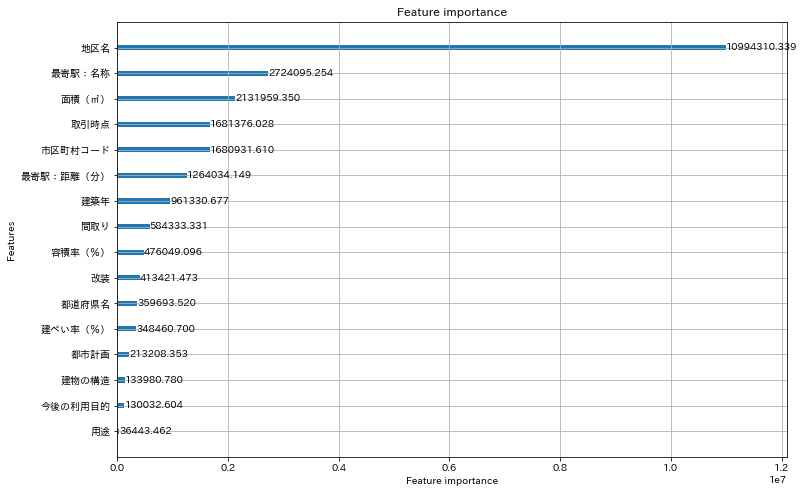

In [23]:
lgb.plot_importance(lgb_reg1, figsize=(12,8), max_num_features=50, importance_type='gain')